In [331]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
from sklearn.linear_model import LogisticRegression
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

#### 2A Data Prep and Clean-Up

In [313]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [314]:
test = test.fillna(test['Fare'].median())

In [315]:
#Map sex to gender to incorporate into logreg
train['Gender'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Gender'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [316]:
#Age filled with median
medianAge = train['Age'].dropna().median()
if len(train.Age[train.Age.isnull()]) > 0:
    train.loc[(train.Age.isnull()),'Age'] = medianAge
    
medianAge = test['Age'].dropna().median()
if len(test.Age[ test.Age.isnull() ]) > 0:
    test.loc[(test.Age.isnull()),'Age'] = medianAge

In [317]:
#Drop all non-numerical columns
train = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
test = test.drop(['Name', 'Sex', 'Ticket', 'Cabin','Embarked'], axis=1) 

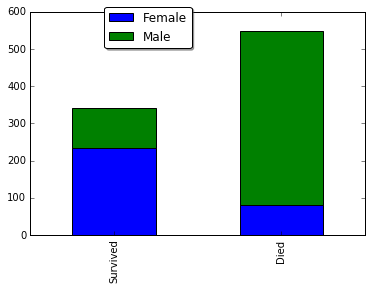

In [318]:
survived_by_gender = train[train['Survived']==1]['Gender'].value_counts()
died_by_gender = train[train['Survived']==0]['Gender'].value_counts()
gender_plot = pd.DataFrame([survived_by_gender,died_by_gender])
gender_plot.index = ['Survived','Died']
gender_plot.columns = ['Female', 'Male']
gender_plot.plot(kind='bar',stacked=True)
#http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)

#### 2B Logistic Regression and Survival Probability

In [319]:
X = train
y = train['Survived']
X = X.drop(['Survived'], axis=1)

In [320]:
#train algorithm with training data
logreg = lm.LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [321]:
logreg.score(X,y)

0.80022446689113358

In [322]:
#predict test values based on training data
pred = logreg.predict(test)

In [323]:
cv.cross_val_score(logreg, X_train, y_train)

array([ 0.83408072,  0.76233184,  0.77477477])

In [324]:
cv.cross_val_score(logreg, X_test,y_test)

array([ 0.76      ,  0.77027027,  0.83783784])

#### 2C Submission of Results

In [325]:
survival = logreg.predict(test)
passenger_id = test['PassengerId'].values

In [326]:
Kaggle = pd.DataFrame({'PassengerID': test.PassengerId, 'Survived': pred })

In [327]:
Kaggle.to_csv("KaggleExport.csv")